<a href="https://colab.research.google.com/github/suk404/Sukriti-Khanal/blob/main/Linear_regression_using_tensorflow_01_(21st_Feb%2C_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Aim: predict the value of a continuous variable.
#classification problem: we are trying to determine the classification of a variable.

In [ ]:
# we need to find out the relationship between response variable and dependent variable

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#tensorflow library to perform deep learning

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [ ]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

In [ ]:
raw_dataset=pd.read_csv(url,names=column_names,na_values='?',sep=" ",skipinitialspace=True,comment='\t')

In [ ]:
dataset=raw_dataset.copy()

In [ ]:
dataset.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1


In [ ]:
dataset.shape

(398, 8)

In [ ]:
dataset.tail(2)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


Clean the data:

checking the null values

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset=dataset.dropna() #dropping or removing the null values

In [ ]:
dataset.shape

(392, 8)

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


To see whether a column has categorigical data or not

In [ ]:
dataset['Origin'].unique()

array([1, 3, 2])

In [ ]:
dataset['Origin'].value_counts()

1    245
3     79
2     68
Name: Origin, dtype: int64

In [ ]:
# since origin column has categorical data we need to perform one hot encoding. by creating three separate columns

In [ ]:
dataset.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset['Origin']=dataset['Origin'].map({1:"USA",2:"Europe",3:"Japan"})

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [ ]:
dataset.loc[50:55,:]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
50,28.0,4,116.0,90.0,2123.0,14.0,71,Europe
51,30.0,4,79.0,70.0,2074.0,19.5,71,Europe
52,30.0,4,88.0,76.0,2065.0,14.5,71,Europe
53,31.0,4,71.0,65.0,1773.0,19.0,71,Japan
54,35.0,4,72.0,69.0,1613.0,18.0,71,Japan
55,27.0,4,97.0,60.0,1834.0,19.0,71,Europe


In [ ]:
#this converts into one-hot encoding
dataset=pd.get_dummies(dataset,columns=['Origin'],prefix="",prefix_sep="")

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [ ]:
dataset.loc[50:55,:]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
50,28.0,4,116.0,90.0,2123.0,14.0,71,1,0,0
51,30.0,4,79.0,70.0,2074.0,19.5,71,1,0,0
52,30.0,4,88.0,76.0,2065.0,14.5,71,1,0,0
53,31.0,4,71.0,65.0,1773.0,19.0,71,0,1,0
54,35.0,4,72.0,69.0,1613.0,18.0,71,0,1,0
55,27.0,4,97.0,60.0,1834.0,19.0,71,1,0,0


Split the dataset into train and test data.

In [ ]:
train_dataset=dataset.sample(frac=0.8,random_state=0)

In [ ]:
test_dataset=dataset.drop(train_dataset.index)

In [ ]:
train_dataset.shape

(314, 10)

In [ ]:
test_dataset.shape

(78, 10)

If there are large values in the dataset, we need to normalize these values.

Check overall stats

In [ ]:
train_dataset.describe().transpose()
#About 68% of the dataset needs to be within 2 std deviation.

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


Split features from label

In [ ]:
# train_features are x1,x2,x3,x4
#train_label is y.

In [ ]:
train_features=train_dataset.copy()

In [ ]:
train_features.head(1)
#MPG is the response variable

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1


In [ ]:
train_labels=train_features.pop('MPG')

In [ ]:
train_labels.head(1)

146    28.0
Name: MPG, dtype: float64

In [ ]:
train_features.head(1)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1


Convert into test features

In [ ]:
test_features=test_dataset.copy()
test_labels=test_features.pop('MPG')

Normalization

In [ ]:
train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [ ]:
# In tensorflow keras, we can use features that automatically normalizes the dataset.

In [ ]:
# we can also normalize the input layer so that when the input is passed it will be the normalized value.

Creating a normalization layer

In [ ]:
#defining a normalizer
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
# since this normalizer does not know the mean and std deviation we need to pass the value for it .
normalizer.adapt(np.array(train_features))# it helps the normalization layer to learn the value of mean and std deviation

In [ ]:
normalizer.mean.numpy()

array([[5.47770691e+00, 1.95318497e+02, 1.04869446e+02, 2.99025171e+03,
        1.55592356e+01, 7.58980942e+01, 1.78343967e-01, 1.97452217e-01,
        6.24203861e-01]], dtype=float32)

In [ ]:
len(normalizer.mean.numpy()[0])

9

In [ ]:
normalizer.variance.numpy()

array([[2.8800766e+00, 1.0850413e+04, 1.4466993e+03, 7.0989688e+05,
        7.7550268e+00, 1.3467321e+01, 1.4653738e-01, 1.5846483e-01,
        2.3457341e-01]], dtype=float32)

In [ ]:
len(normalizer.variance.numpy()[0])

9

### **Regression with DNN**





In [ ]:
# creatign a neural network
# normalizer acts are the input layer.
# regression operation only gives a single value


model=keras.Sequential([
                        normalizer,
                        layers.Dense(64,activation="relu"),
                        layers.Dense(64,activation="relu"),
                        layers.Dense(1)
])


In [ ]:
#total number of trainable parameter for the first layer= 64*9+64.
#no. of weights=64*9
#no. of bias = 64

#In second hidden layer,
#no. of trainable parameter=64*64+64
#no. of weights=64*64
#no. of bias = 64

#In output layer,
#no. of trainable parameter= 64*1+1
#no. of weights=64*1
#no. of bias=1

In [ ]:
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
model.summary()
#there are 9 neurons and for mean and variance 2,
#9*2=18
#64*9+64 =640
#64*64+64 =4160
#64*1+1 = 65

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [ ]:
#parameters where back propagation is send= 4865.

In [ ]:
#step you are taking to reach the minimal loss value.

In [ ]:
#model is trained now, we need to send the dataset for validation while ttraining is taking plac.e

%%time
history=model.fit(train_features, train_labels,validation_split=0.2,epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 23.1678 - val_loss: 23.3666
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 22.5936 - val_loss: 22.7128
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 21.9571 - val_loss: 21.9247
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 21.1531 - val_loss: 20.8842
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 20.0630 - val_loss: 19.4966
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 18.6106 - val_loss: 17.6628
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 16.6958 - val_loss: 15.2181
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 14.2369 - val_loss: 12.6751
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 11.7792 - val_loss: 10.3402
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 9.3042 - val_loss: 7.9545
Epoch 11/1

In [ ]:
history.history

{'loss': [23.167783737182617,
  22.593555450439453,
  21.95710563659668,
  21.153053283691406,
  20.062997817993164,
  18.610565185546875,
  16.695844650268555,
  14.236892700195312,
  11.779199600219727,
  9.30417251586914,
  6.796900749206543,
  5.69014310836792,
  5.0512003898620605,
  4.491535663604736,
  4.000200271606445,
  3.624052047729492,
  3.31072735786438,
  3.097970485687256,
  2.8897688388824463,
  2.7508814334869385,
  2.6023032665252686,
  2.4798052310943604,
  2.379856586456299,
  2.3031749725341797,
  2.2426609992980957,
  2.1934359073638916,
  2.1287190914154053,
  2.105722188949585,
  2.0533254146575928,
  2.0198471546173096,
  1.994463324546814,
  1.981310486793518,
  1.9554649591445923,
  1.946180820465088,
  1.9278571605682373,
  1.9192241430282593,
  1.9024018049240112,
  1.9151352643966675,
  1.8880549669265747,
  1.9114924669265747,
  1.8812434673309326,
  1.8586562871932983,
  1.8570576906204224,
  1.8515287637710571,
  1.8534348011016846,
  1.833275198936462

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
history.history['loss']

[23.167783737182617,
 22.593555450439453,
 21.95710563659668,
 21.153053283691406,
 20.062997817993164,
 18.610565185546875,
 16.695844650268555,
 14.236892700195312,
 11.779199600219727,
 9.30417251586914,
 6.796900749206543,
 5.69014310836792,
 5.0512003898620605,
 4.491535663604736,
 4.000200271606445,
 3.624052047729492,
 3.31072735786438,
 3.097970485687256,
 2.8897688388824463,
 2.7508814334869385,
 2.6023032665252686,
 2.4798052310943604,
 2.379856586456299,
 2.3031749725341797,
 2.2426609992980957,
 2.1934359073638916,
 2.1287190914154053,
 2.105722188949585,
 2.0533254146575928,
 2.0198471546173096,
 1.994463324546814,
 1.981310486793518,
 1.9554649591445923,
 1.946180820465088,
 1.9278571605682373,
 1.9192241430282593,
 1.9024018049240112,
 1.9151352643966675,
 1.8880549669265747,
 1.9114924669265747,
 1.8812434673309326,
 1.8586562871932983,
 1.8570576906204224,
 1.8515287637710571,
 1.8534348011016846,
 1.8332751989364624,
 1.8452515602111816,
 1.8319884538650513,
 1.829808

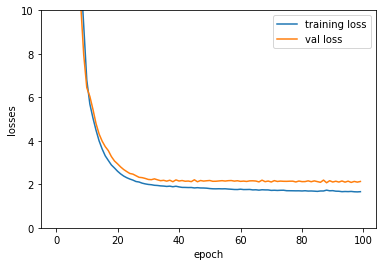

In [ ]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.ylim([0,10])
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend()
plt.show()

In [ ]:
model_df=pd.DataFrame({
    'Actual':test_labels,
    'predicted': model.predict(test_features).flatten()
})


In [ ]:
model_df.head()

,Actual,predicted
9,15.0,15.507403
25,10.0,11.101494
28,9.0,11.286035
31,25.0,24.540337
33,19.0,20.044167


In [ ]:
# mse = tf.metrics.mean_squared_error(test_labels, model.predict(test_features).flatten())

In [ ]:
# print(mse)

In [ ]:
score=model.evaluate(test_features,test_labels)


3/3 [==============================] - 0s 4ms/step - loss: 1.7471
